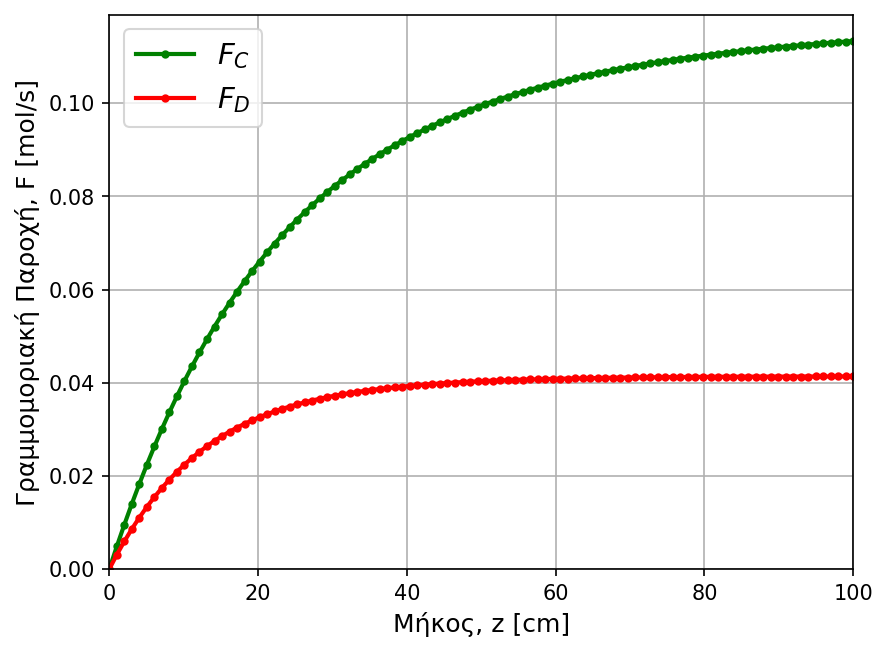

In [77]:
# Reactor 1 (Fixed Inlet) - Isothermal operation

# Importing required libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of differential equations
def R1_Isothermal(X, z):
    # Model Parameters
    D = 5            # Reactor Diameter (cm)
    FAo = 0.2        # Molecular flowrate (in) (mol*s^-1)
    FBo = 0.2        # Molecular flowrate (in) (mol*s^-1)
    P = 1            # Reactor Pressure (atm)
    To = 400         # Reactor Inlet Temperature (K)
    k01 = 1.5e14     # Frequency coefficient (cm^3/mol/s)
    k02 = 5e16       # Frequency coefficient (cm^3/mol/s)
    ER1 = 7500       # -E1/R 
    ER2 = 10000      # -E2/R 
    Rc = 0.08206     # Universal Gas Constant [L*atm/mol/K]
    
    # Extract state variables
    X1 = z[0]        # Conversion of reaction 1
    X2 = z[1]        # Conversion of reaction 2
    T  = To          # Temperature
    
    # Rate & other Algebraic Equations
    k1 = k01 * np.exp(-ER1 / T)
    k2 = k02 * np.exp(-ER2 / T)
    S = (np.pi * D**2) / 4
    Qo = (FAo + FBo) * (Rc * 1000) * To / P
    Q = Qo * (T / To) * (1 - 0.5 * X1 - 0.25 * X2)
    R_rate1 = k1 * FBo**2 * (1 - X1) * (1 - X1 - X2) / Q**2
    R_rate2 = k2 * FBo**2 * (1 - X1 - X2)**2 / Q**2
    
    dX1_dz = S * R_rate1 / FBo
    dX2_dz = 2 * S * R_rate2 / FBo
    
    return [dX1_dz, dX2_dz]

# Integration time scale
zspan = (0, 100)                                # Reactor length range
z_eval = np.linspace(zspan[0], zspan[1], 100)   # Evaluate points along the reactor length

# Initial conditions for non-isothermal case
Init_Cond_R1 = [0, 0]

# Solve for the non-isothermal case
sol_R1 = solve_ivp(R1_Isothermal, zspan, Init_Cond_R1, t_eval=z_eval, method='RK45')

# Extracting results
z_R1 = sol_R1.t
X1_R1 = sol_R1.y[0, :]
X2_R1 = sol_R1.y[1, :]

# Calculate Molar Flowrates
FBo = 0.2                 # Molecular flowrate of species B
FC_R1 = FBo * X1_R1       # Molecular flowrate of species C
FD_R1 = 0.5 * FBo * X2_R1 # Molecular flowrate of species D

# Plotting results
plt.figure(dpi=150)

plt.plot(z_R1, FC_R1, 'g-o', label='$F_C$', linewidth=2, markersize=3)
plt.plot(z_R1, FD_R1, 'r-o', label='$F_D$', linewidth=2, markersize=3)
plt.grid()
plt.xlabel('Μήκος, z [cm]', fontsize=12)
plt.ylabel('Γραμμομοριακή Παροχή, F [mol/s]', fontsize=12)
plt.xlim(left=0, right=100)     # X-axis starts at 0
plt.ylim(bottom=0)              # Y-axis starts at 0
plt.legend(fontsize=14)
plt.show()

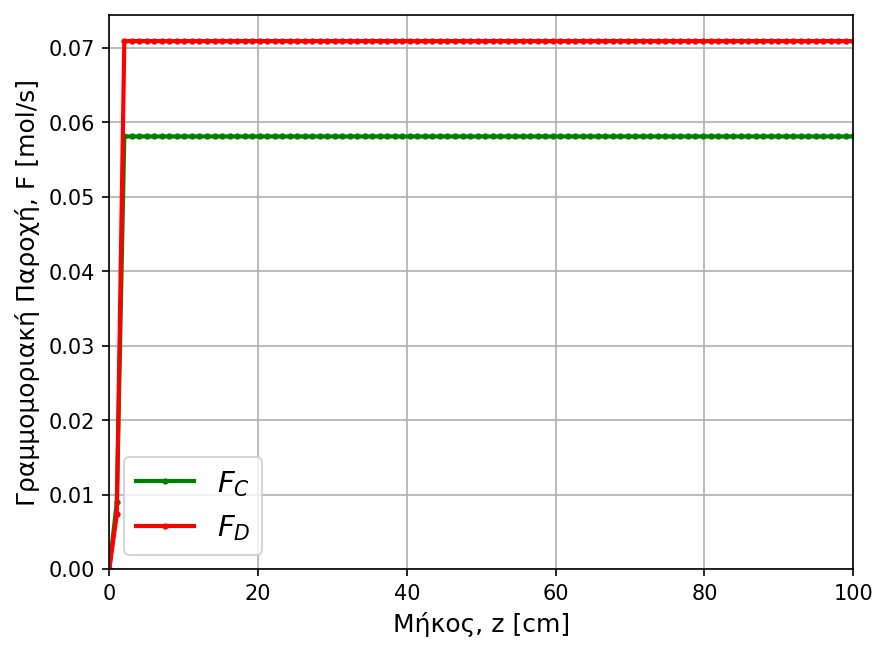

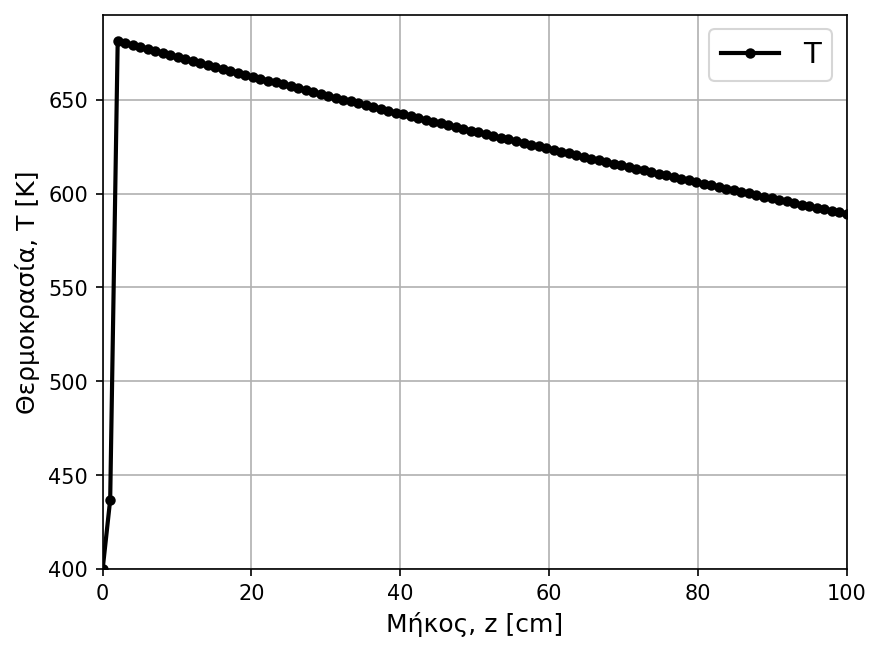

In [76]:
# Reactor 1 (Fixed Inlet) - Non-Isothermal operation

# Importing required libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of differential equations
def R1_Non_Isothermal(X, z):
    # Model Parameters
    D = 5            # Reactor Diameter (cm)
    FAo = 0.2        # Molecular flowrate (in) (mol*s^-1)
    FBo = 0.2        # Molecular flowrate (in) (mol*s^-1)
    P = 1            # Reactor Pressure (atm)
    To = 400         # Reactor Inlet Temperature (K)
    Ta = 298.15      # Coolant Inlet Temperature (K)
    k01 = 1.5e14     # Frequency coefficient (cm^3/mol/s)
    k02 = 5e16       # Frequency coefficient (cm^3/mol/s)
    ER1 = 7500       # -E1/R 
    ER2 = 10000      # -E2/R 
    DHr1 = -1.5e5    # Heat of Reaction (kcal/kmol)
    DHr2 = -1e5      # Heat of Reaction (kcal/kmol)
    U = 0.01         # Heat Transfer Coefficient (W/cm^2/K)
    Cp = 2           # Heat Capacity (J/h/K)
    MA = 60          # Molar Mass (g/mol)
    MB = 80          # Molar Mass (g/mol)
    Rc = 0.08206     # Universal Gas Constant [L*atm/mol/K]
    
    # Extract state variables
    X1 = z[0]        # Conversion of reaction 1
    X2 = z[1]        # Conversion of reaction 2
    T  = z[2]        # Temperature
    
    # Rate & other Algebraic Equations
    k1 = k01 * np.exp(-ER1 / T)
    k2 = k02 * np.exp(-ER2 / T)
    S = (np.pi * D**2) / 4
    Qo = (FAo + FBo) * (Rc * 1000) * To / P
    Q = Qo * (T / To) * (1 - 0.5 * X1 - 0.25 * X2)
    R_rate1 = k1 * FBo**2 * (1 - X1) * (1 - X1 - X2) / Q**2
    R_rate2 = k2 * FBo**2 * (1 - X1 - X2)**2 / Q**2
    Mo_tot = MA * FAo + MB * FBo
    
    dX1_dz = S * R_rate1 / FBo
    dX2_dz = 2 * S * R_rate2 / FBo
    dT_dz  = - S * (DHr1 * R_rate1 + DHr2 * R_rate2) / (Mo_tot * Cp) + 4 * U * S * (Ta - T) / (D * Mo_tot * Cp)
    
    return [dX1_dz, dX2_dz, dT_dz]


# Integration time scale
zspan = (0, 100)                                # Reactor length range
z_eval = np.linspace(zspan[0], zspan[1], 100)   # Evaluate points along the reactor length

# Initial conditions for non-isothermal case
Init_Cond_NI_R1 = [0, 0, 400]

# Solve for the non-isothermal case
sol_NI_R1 = solve_ivp(R1_Non_Isothermal, zspan, Init_Cond_NI_R1, t_eval=z_eval, method='BDF')

# Extracting results
z_NI_R1  = sol_NI_R1.t
X1_NI_R1 = sol_NI_R1.y[0, :]
X2_NI_R1 = sol_NI_R1.y[1, :]
T_NI_R1  = sol_NI_R1.y[2, :]

# Calculate Molar Flowrates
FBo = 0.2                       # Molecular flowrate of species B
FC_NI_R1 = FBo * X1_NI_R1       # Molecular flowrate of species C
FD_NI_R1 = 0.5 * FBo * X2_NI_R1 # Molecular flowrate of species D

# Plotting results
plt.figure(dpi=150)

plt.plot(z_NI_R1, FC_NI_R1, 'g-o', label='$F_C$', linewidth=2, markersize=2)
plt.plot(z_NI_R1, FD_NI_R1, 'r-o', label='$F_D$', linewidth=2, markersize=2)
plt.grid()
plt.xlabel('Μήκος, z [cm]', fontsize=12)
plt.ylabel('Γραμμομοριακή Παροχή, F [mol/s]', fontsize=12)
plt.xlim(left=0, right=100)     # X-axis starts at 0
plt.ylim(bottom=0)              # Y-axis starts at 0
plt.legend(fontsize=14)
plt.show()

# Reactor Temperature
plt.figure(dpi=150)
plt.plot(z_NI_R1, T_NI_R1, 'k-o', label='T', linewidth=2, markersize=4)
plt.grid()
plt.xlabel('Μήκος, z [cm]', fontsize=12)
plt.ylabel('Θερμοκρασία, T [K]', fontsize=12)
plt.xlim(left=0, right=100)     # X-axis starts at 0
plt.ylim(bottom=400)              # Y-axis starts at 0
plt.legend(fontsize=14)
plt.show()


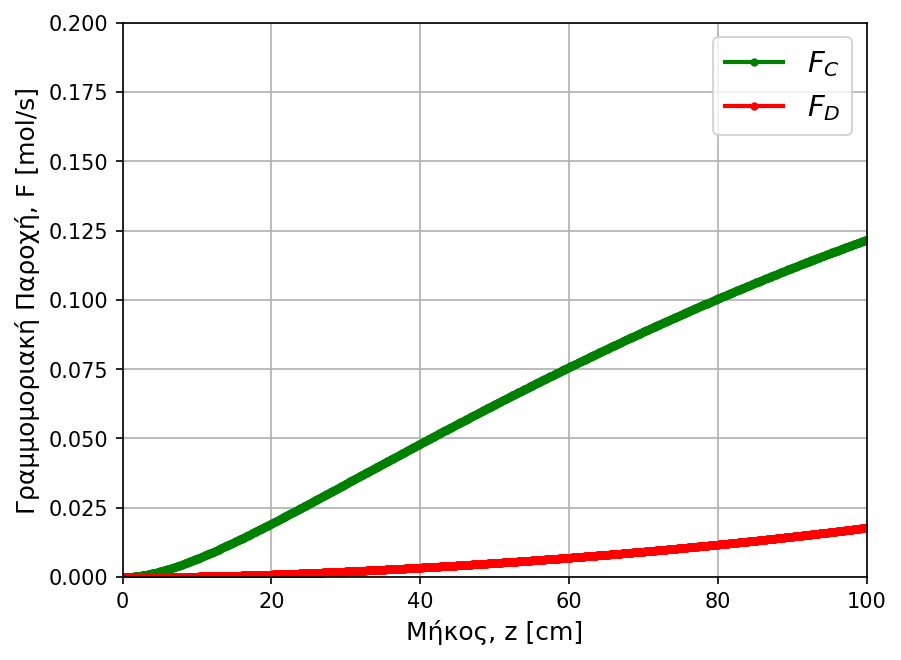

In [1]:
# Reactor 2 (Variable Inlet) - Isothermal operation

# Importing required libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of differential equations
def R2_Isothermal(z, X):
    # Model Parameters
    D = 5            # Reactor Diameter (cm)
    L = 100          # Reactor Length (cm)
    FAo = 0.2        # Molecular flowrate (in) (mol*s^-1)
    FBo = 0.2        # Molecular flowrate (in) (mol*s^-1)
    P = 1            # Reactor Pressure (atm)
    To = 400         # Reactor Inlet Temperature (K)
    k01 = 1.5e14     # Frequency coefficient (cm^3/mol/s)
    k02 = 5e16       # Frequency coefficient (cm^3/mol/s)
    ER1 = 7500       # -E1/R 
    ER2 = 10000      # -E2/R 
    Rc = 0.08206     # Universal Gas Constant [L*atm/mol/K]
    
    # Extract state variables
    X1 = X[0]        # Conversion of reaction 1
    X2 = X[1]        # Conversion of reaction 2
    T  = To          # Temperature
    
    # Rate & other Algebraic Equations
    k1 = k01 * np.exp(-ER1 / T)
    k2 = k02 * np.exp(-ER2 / T)
    S = (np.pi * D**2) / 4
    FBov = FBo * z / L
    FA = FAo - FBov * X1
    FB = FBov * (1 - X1 - X2)
    FC = FBov * X1
    FD = 0.5 * FBov * X2
    Ftot = FA + FB + FC + FD
    Q = Ftot * (Rc * 1000) * T / P
    R_rate1 = k1 * FA * FB / Q**2
    R_rate2 = k2 * FB**2 / Q**2
    
    dX1_dz = -X1 / z + S * R_rate1 / FBov
    dX2_dz = -X2 / z + 2 * S * R_rate2 / FBov
    
    return [dX1_dz, dX2_dz]

# Integration time scale
z_eval_R2 = np.arange(0.1, 100, 0.1)        # Evaluate points along the reactor length
zspan_R2 = [z_eval_R2[0], z_eval_R2[-1]]   # Reactor length range

# Initial conditions for non-isothermal case
Init_Cond_R2 = [0, 0]

# Solve for the non-isothermal case
sol_R2 = solve_ivp(R2_Isothermal, zspan_R2, Init_Cond_R2, t_eval=z_eval_R2, method='RK45')

# Extracting results
z_R2 = sol_R2.t
X1_R2 = sol_R2.y[0, :]
X2_R2 = sol_R2.y[1, :]

# Calculate Molar Flowrates
FBo_R2 = 0.2 * z_R2 / 100       # Molecular flowrate of species B
FC_R2 = FBo_R2 * X1_R2          # Molecular flowrate of species C
FD_R2 = 0.5 * FBo_R2 * X2_R2    # Molecular flowrate of species D

# Plotting results
plt.figure(dpi=150)

plt.plot(z_R2, FC_R2, 'g-o', label='$F_C$', linewidth=2, markersize=3)
plt.plot(z_R2, FD_R2, 'r-o', label='$F_D$', linewidth=2, markersize=3)
plt.grid()
plt.xlabel('Μήκος, z [cm]', fontsize=12)
plt.ylabel('Γραμμομοριακή Παροχή, F [mol/s]', fontsize=12)
plt.xlim(left=0, right=100)     # X-axis starts at 0
plt.ylim(bottom=0, top=0.20)              # Y-axis starts at 0
plt.legend(fontsize=14)
plt.show()

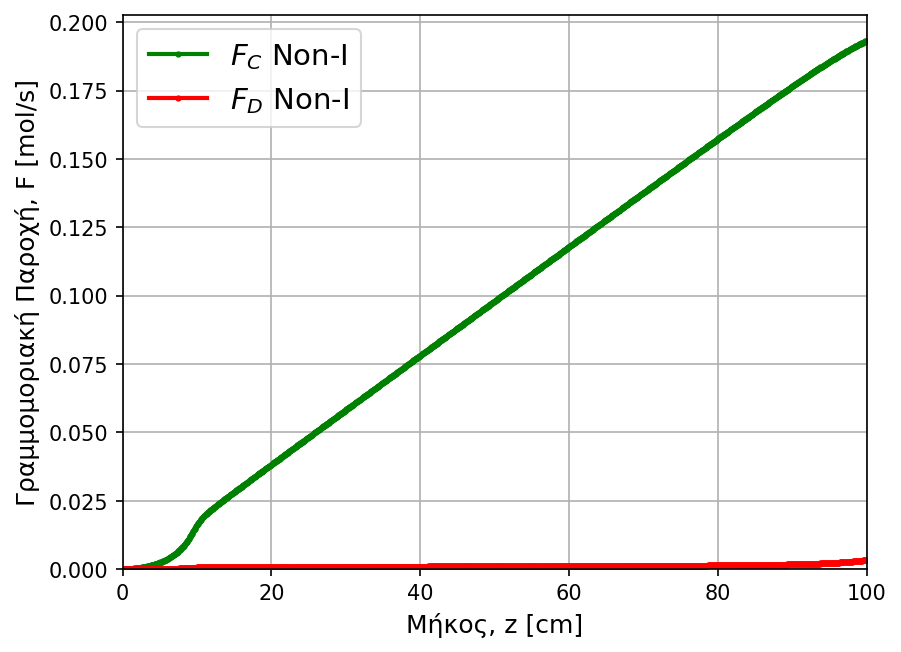

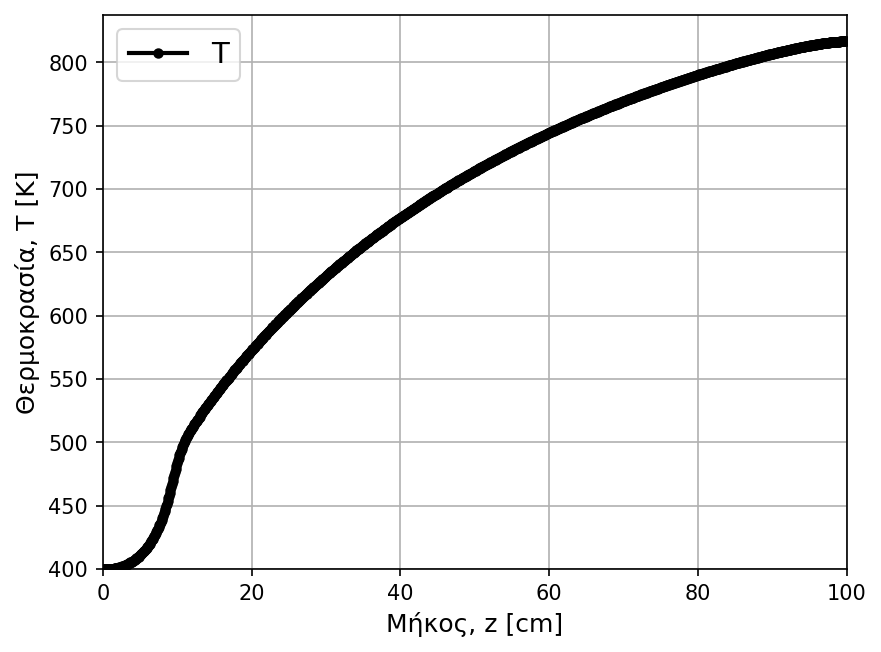

In [2]:
# Reactor 2 (Variable Inlet) - Non-Isothermal operation

# Importing required libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of differential equations
def R2_Non_Isothermal(z, X):
    # Model Parameters
    D = 5            # Reactor Diameter (cm)
    L = 100          # Reactor Length (cm)
    FAo = 0.2        # Molecular flowrate (in) (mol*s^-1)
    FBo = 0.2        # Molecular flowrate (in) (mol*s^-1)
    P = 1            # Reactor Pressure (atm)
    To = 400         # Reactor Inlet Temperature (K)
    Ta = 298.15      # Coolant Inlet Temperature (K)
    k01 = 1.5e14     # Frequency coefficient (cm^3/mol/s)
    k02 = 5e16       # Frequency coefficient (cm^3/mol/s)
    ER1 = 7500       # -E1/R 
    ER2 = 10000      # -E2/R 
    DHr1 = -1.5e5    # Heat of Reaction (kcal/kmol)
    DHr2 = -1e5      # Heat of Reaction (kcal/kmol)
    U = 0.01         # Heat Transfer Coefficient (W/cm^2/K)
    Cp = 2           # Heat Capacity (J/h/K)
    MA = 60          # Molar Mass (g/mol)
    MB = 80          # Molar Mass (g/mol)
    Rc = 0.08206     # Universal Gas Constant [L*atm/mol/K]
    
    # Extract state variables
    X1 = X[0]        # Conversion of reaction 1
    X2 = X[1]        # Conversion of reaction 2
    T  = X[2]        # Temperature
    
    # Rate & other Algebraic Equations
    k1 = k01 * np.exp(-ER1 / T)
    k2 = k02 * np.exp(-ER2 / T)
    S = (np.pi * D**2) / 4
    FBov = FBo * z / L
    FA = FAo - FBov * X1
    FB = FBov * (1 - X1 - X2)
    FC = FBov * X1
    FD = 0.5 * FBov * X2
    Ftot = FA + FB + FC + FD
    Q = Ftot * (Rc * 1000) * T / P
    R_rate1 = k1 * FA * FB / Q**2
    R_rate2 = k2 * FB**2 / Q**2
    Mo_tot = MA * FAo + MB * FBov
    
    dX1_dz = -X1 / z + S * R_rate1 / FBov
    dX2_dz = -X2 / z + 2 * S * R_rate2 / FBov
    dT_dz  = -MB * FBo * (T-To)/ (L * Mo_tot) - S * (DHr1 * R_rate1 + DHr2 * R_rate2) / (Mo_tot * Cp) + np.pi * U * D * (Ta - T) / (Mo_tot * Cp)
    
    return [dX1_dz, dX2_dz, dT_dz]


# Integration time scale
z_eval_NI_R2 = np.arange(0.1, 100, 0.1)        # Evaluate points along the reactor length
zspan_NI_R2 = [z_eval_NI_R2[0], z_eval_NI_R2[-1]]   # Reactor length range


# Initial conditions for non-isothermal case
Init_Cond_NI_R2 = [0, 0, 400]

# Solve for the non-isothermal case
sol_NI_R2 = solve_ivp(R2_Non_Isothermal, zspan_NI_R2, Init_Cond_NI_R2, t_eval=z_eval_NI_R2, method='BDF')

# Extracting results
z_NI_R2  = sol_NI_R2.t
X1_NI_R2 = sol_NI_R2.y[0, :]
X2_NI_R2 = sol_NI_R2.y[1, :]
T_NI_R2  = sol_NI_R2.y[2, :]

# Calculate Molar Flowrates
FBo_R2 = 0.2 * z_NI_R2 / 100           # Molecular flowrate of species B
FC_NI_R2 = FBo_R2 * X1_NI_R2           # Molecular flowrate of species C
FD_NI_R2 = 0.5 * FBo_R2 * X2_NI_R2     # Molecular flowrate of species D

# Plotting results
plt.figure(dpi=150)

plt.plot(z_NI_R2, FC_NI_R2, 'g-o', label='$F_C$ Non-I', linewidth=2, markersize=2)
plt.plot(z_NI_R2, FD_NI_R2, 'r-o', label='$F_D$ Non-I', linewidth=2, markersize=2)
plt.grid()
plt.xlabel('Μήκος, z [cm]', fontsize=12)
plt.ylabel('Γραμμομοριακή Παροχή, F [mol/s]', fontsize=12)
plt.xlim(left=0, right=100)     # X-axis starts at 0
plt.ylim(bottom=0)              # Y-axis starts at 0
plt.legend(fontsize=14)
plt.show()

# Reactor Temperature
plt.figure(dpi=150)
plt.plot(z_NI_R2, T_NI_R2, 'k-o', label='T', linewidth=2, markersize=4)
plt.grid()
plt.xlabel('Μήκος, z [cm]', fontsize=12)
plt.ylabel('Θερμοκρασία, T [K]', fontsize=12)
plt.xlim(left=0, right=100)     # X-axis starts at 0
plt.ylim(bottom=400)              # Y-axis starts at 0
plt.legend(fontsize=14)
plt.show()


In [61]:
%reset -f